In [41]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5

figure_prefix = 'figures/breakdown_wave_analysis_figure_'

In [42]:
## Load the data
fname = "./data/breakdowns_2000_to_2100.h5"
with h5.File(fname, 'r') as f:
    print(f.keys())
    waveforms = f['waveforms'][:]
    timestamps = f['wavetimes'][:]


<KeysViewHDF5 ['dark_charge', 'waveforms', 'wavetimes']>


In [43]:
## Calculate baselines
baseline = np.mean(waveforms[:,0:750], axis=1)
waveforms = waveforms - baseline[:, np.newaxis]

## Calculate mean waveform
mean_waveform = np.mean(waveforms, axis=0)

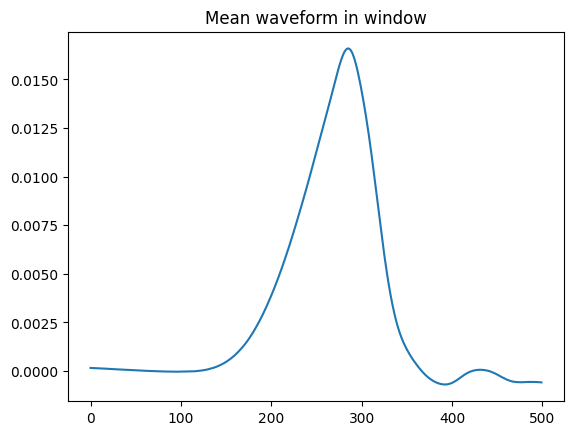

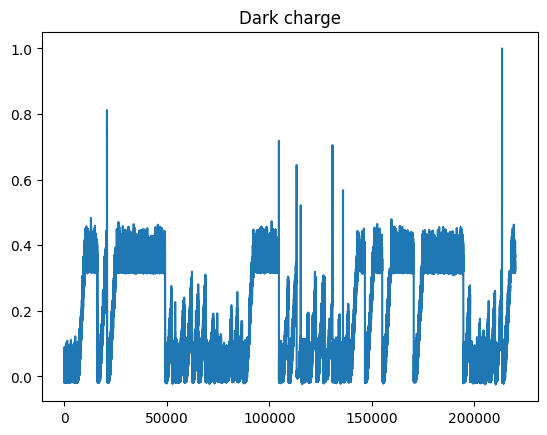

In [44]:
## Calculate psudo dark charge

window_center = 1250
window_width = 250
window_start = window_center - window_width
window_end = window_center + window_width
plt.figure()
plt.plot(mean_waveform[window_start:window_end])
plt.title('Mean waveform in window')
plt.savefig(figure_prefix + 'mean_waveform_window.png')

def calculate_dark_charge(waveform, window_start, window_end):
    return np.sum(waveform[window_start:window_end])


dark_charge = np.array([calculate_dark_charge(waveform, window_start, window_end) for waveform in waveforms])

normalization_value = np.amax(dark_charge)
dark_charge = dark_charge/normalization_value

plt.figure()
plt.plot(dark_charge, '-')
plt.title('Dark charge')
plt.savefig(figure_prefix + 'dark_charge.png')

Number of outliers:  9


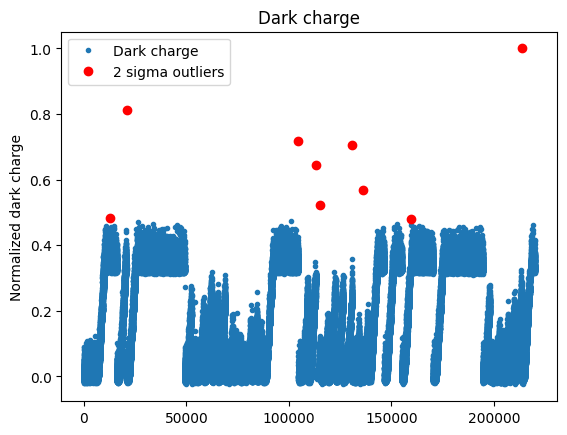

In [45]:
##Find outliers
mean_dark_charge = np.mean(dark_charge)
std_dark_charge = np.std(dark_charge)

n = 2

outliers = np.abs(dark_charge - mean_dark_charge) > n*std_dark_charge
print('Number of outliers: ', np.sum(outliers))

plt.figure()
plt.plot(dark_charge, '.')
plt.plot(np.where(outliers)[0], dark_charge[outliers], 'ro')
plt.title('Dark charge')
plt.legend(['Dark charge', f'{n} sigma outliers'])
plt.ylabel('Normalized dark charge')
plt.savefig(figure_prefix + 'dark_charge_outliers.png')

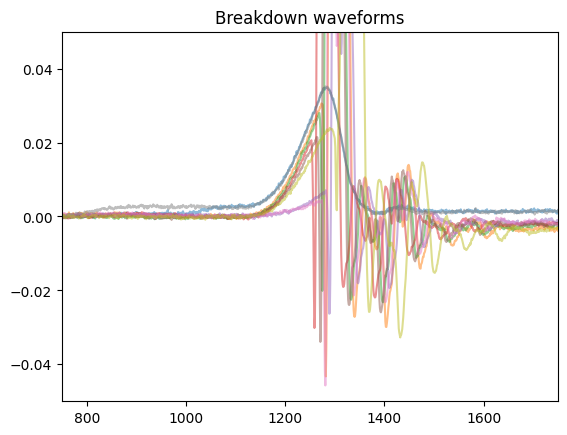

In [46]:
#Plot outliers
outlier_waveforms = waveforms[outliers]
plt.figure()
plt.plot(outlier_waveforms.T, alpha=0.5)
plt.title('Breakdown waveforms')
plt.xlim((750,1750))
plt.ylim((-0.05, 0.05))
plt.savefig(figure_prefix + 'outlier_waveforms.png')

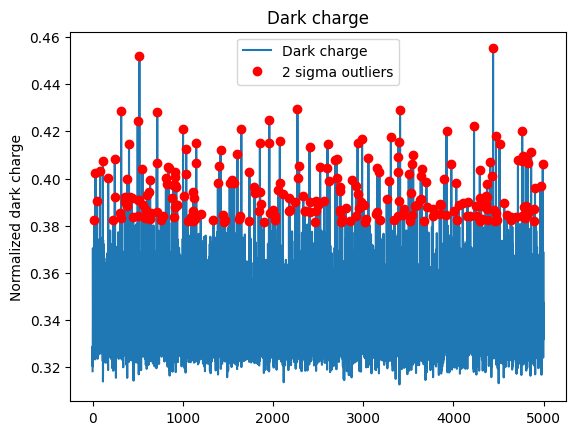

In [47]:
## Oscillations
waveforms_osc = waveforms[40000:45000]
dark_charge_osc = dark_charge[40000:45000]
plt.figure()
plt.plot(dark_charge_osc, '-')

mean_osc = np.mean(dark_charge_osc)
std_osc = np.std(dark_charge_osc)

n = 2

outlier_osc = np.abs(dark_charge_osc - mean_osc) > n*std_osc

plt.plot(np.where(outlier_osc)[0], dark_charge_osc[outlier_osc], 'ro')
plt.title('Dark charge')
plt.legend(['Dark charge', f'{n} sigma outliers'])
plt.ylabel('Normalized dark charge')
plt.savefig(figure_prefix + 'dark_charge_osc.png')


Bump charge is 0.034
Mean charge is 0.004
2 sigma outliers are 0.039 above mean
Bump charge adds 0.030 to the mean charge
Explains 75.33% of the mean charge


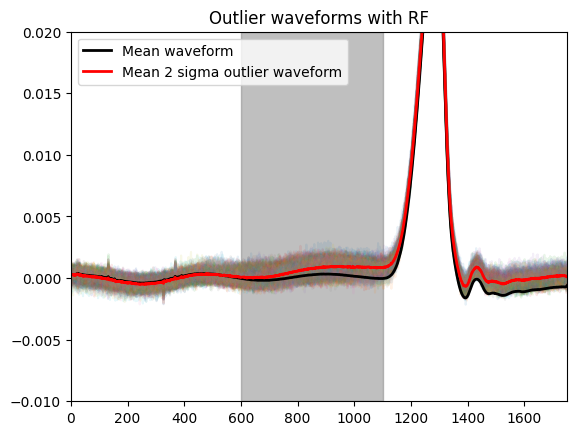

In [48]:
plt.plot(waveforms_osc[outlier_osc].T, alpha=0.1)

plt.plot(np.mean(waveforms_osc, axis=0), 'k', linewidth=2, label='Mean waveform')
plt.plot(np.mean(waveforms_osc[outlier_osc], axis=0), 'r', linewidth=2, label=f'Mean {n} sigma outlier waveform')
plt.title('Outlier waveforms with RF')
plt.xlim((0,1750))
plt.ylim((-0.01, 0.02))

bump_charge = np.mean(np.sum(waveforms_osc[outlier_osc,600:1100], axis=1))/normalization_value
mean_charge = np.mean(np.sum(waveforms_osc[:, 600:1100], axis=1))/normalization_value
print(f'Bump charge is {bump_charge:.3f}')
print(f'Mean charge is {mean_charge:.3f}')
print(f'{n} sigma outliers are {(n*std_osc):.3f} above mean')
print(f'Bump charge adds {bump_charge-mean_charge:.3f} to the mean charge')
print(f'Explains {100*(bump_charge-mean_charge)/(n*std_osc):.2f}% of the mean charge')
plt.fill_between([600, 1100], -0.01, 0.02, color='gray', alpha=0.5)
plt.legend()
plt.savefig(figure_prefix + 'outlier_waveforms_osc.png')

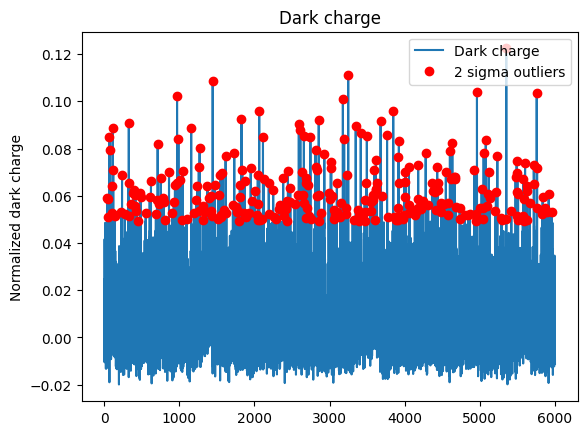

In [49]:
## Oscillations without RF
i1 = 0
i2 = 6000
waveforms_osc = waveforms[i1:i2]
dark_charge_osc = dark_charge[i1:i2]
plt.figure()
plt.plot(dark_charge_osc, '-')
plt.title('Dark charge')

mean_osc = np.mean(dark_charge_osc)
std_osc = np.std(dark_charge_osc)

n = 2

outlier_osc = np.abs(dark_charge_osc - mean_osc) > n*std_osc

plt.plot(np.where(outlier_osc)[0], dark_charge_osc[outlier_osc], 'ro')
plt.title('Dark charge')
plt.legend(['Dark charge', f'{n} sigma outliers'])
plt.ylabel('Normalized dark charge')
plt.savefig(figure_prefix + 'dark_charge_osc_no_RF.png')

Bump charge is 0.031
Mean charge is 0.004
2 sigma outliers are 0.040 above mean
Bump charge adds 0.027 to the mean charge
Explains 66.18% of the mean charge


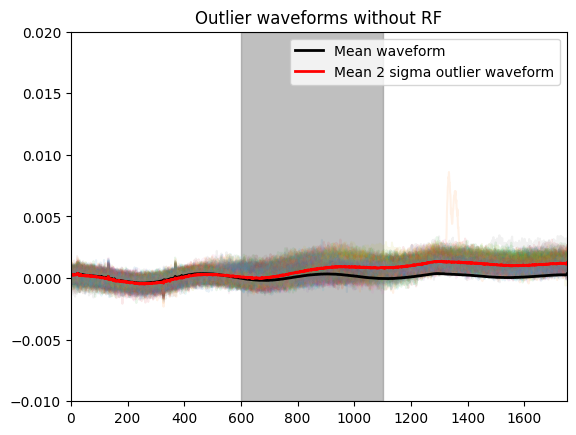

In [50]:
plt.plot(waveforms_osc[outlier_osc].T, alpha=0.1)

plt.plot(np.mean(waveforms_osc, axis=0), 'k', linewidth=2, label='Mean waveform')
plt.plot(np.mean(waveforms_osc[outlier_osc], axis=0), 'r', linewidth=2, label=f'Mean {n} sigma outlier waveform')
plt.title('Outlier waveforms without RF')
plt.xlim((0,1750))
plt.ylim((-0.01, 0.02))

bump_charge = np.mean(np.sum(waveforms_osc[outlier_osc,600:1100], axis=1))/normalization_value
mean_charge = np.mean(np.sum(waveforms_osc[:, 600:1100], axis=1))/normalization_value
print(f'Bump charge is {bump_charge:.3f}')
print(f'Mean charge is {mean_charge:.3f}')
print(f'{n} sigma outliers are {(n*std_osc):.3f} above mean')
print(f'Bump charge adds {bump_charge-mean_charge:.3f} to the mean charge')
print(f'Explains {100*(bump_charge-mean_charge)/(n*std_osc):.2f}% of the mean charge')
plt.fill_between([600, 1100], -0.01, 0.02, color='gray', alpha=0.5)
plt.legend()
plt.savefig(figure_prefix + 'outlier_waveforms_osc_no_RF.png')